In [1]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

from sklearn.metrics import silhouette_score

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [3]:
df = pd.read_csv('/content/bankmarketing.csv')

In [4]:
df = df.drop(['y', 'cons.price.idx', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent


##DATASET:

*   age (numeric)
*   job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
*   marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
*   education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
*   default: has credit in default? (categorical: 'no','yes','unknown')
*   housing: has housing loan? (categorical: 'no','yes','unknown')
*   loan: has personal loan? (categorical: 'no','yes','unknown')
contact: contact communication type (categorical: 'cellular','telephone')
*   month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
*   day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
*   poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')



In [6]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

In [7]:
df_cat = df.loc[:, df.dtypes == object]

In [8]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [9]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [10]:
# Checking Null values
df_cat.isnull().sum()*100/df_cat.shape[0]
# There are no NULL values in the dataset, hence it is clean.

job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
poutcome       0.0
dtype: float64

## LABEL-ENCODING

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


## K-MODES Y ELBOW

In [12]:
from kmodes.kmodes import KModes

In [13]:
# Rango de valores k a probar
k_values = range(2, 7)
cost = []
sil = []

# Iteramos sobre cada valor de k
for k in k_values:
    # Instanciamos el algoritmo k-modes
    km = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0)

    # Ajustamos el modelo con los datos
    clusters = km.fit_predict(df_cat)
    cost.append(km.cost_)

    # Calculamos el silhouette score para los clusters
    silhouette_avg = silhouette_score(df_cat, clusters, metric='hamming')
    sil.append(silhouette_avg)
    print("Para k =", k, "el silhouette score es", silhouette_avg)

Para k = 2 el silhouette score es 0.10550170721022188
Para k = 3 el silhouette score es 0.07808720197526389
Para k = 4 el silhouette score es 0.07022582825241505
Para k = 5 el silhouette score es 0.06936691690777123
Para k = 6 el silhouette score es 0.06654962195601027


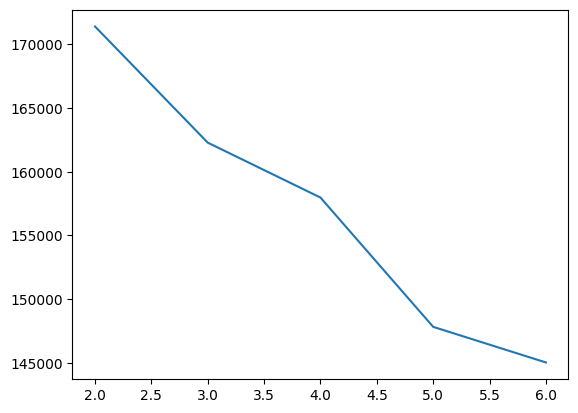

In [14]:
y = np.array([i for i in k_values])
plt.plot(y, cost)
plt.show()

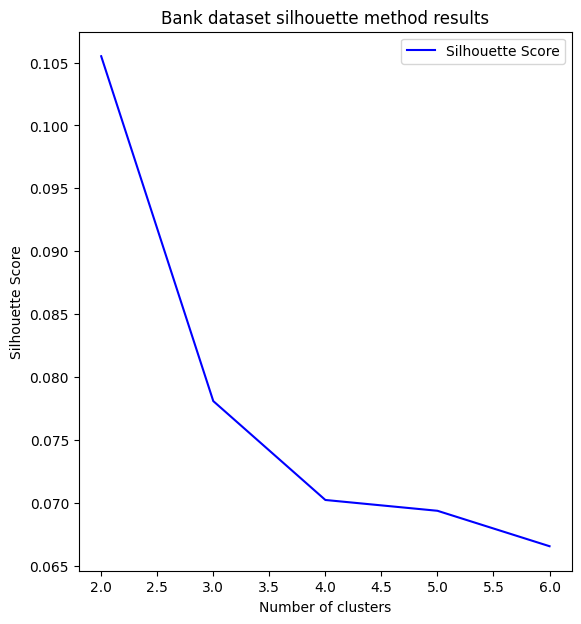

In [15]:
fig = plt.figure(figsize=(14,7))
fig.add_subplot(122)
plt.title("Bank dataset silhouette method results")
plt.plot(k_values, sil,'b-',label='Silhouette Score')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

## MODELO

In [16]:
#k=2
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 5, verbose=1)
model = km_cao.fit_predict(df_cat)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3657, cost: 171406.0


In [17]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cat.columns

In [18]:
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0,1,6,0,2,0,0,6,2,1
1,1,2,3,0,0,0,1,6,4,1


## UNIR AMBOS DATASETS

In [19]:
model = pd.DataFrame(model)
df_combined = pd.concat([df_cat, model], axis =1)
df_combined = df_combined.rename(columns = {0:"cluster"})
df_combined.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,cluster
0,3,1,0,0,0,0,1,6,1,1,1
1,7,1,3,1,0,0,1,6,1,1,1
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,1


In [20]:
cluster_0 = df_combined[df_combined['cluster'] == 0]
cluster_1 = df_combined[df_combined['cluster'] == 1]

In [21]:
cluster_0.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,cluster
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
6,0,1,5,0,0,0,1,6,1,1,0
13,3,0,0,0,2,0,1,6,1,1,0
14,1,1,1,0,2,0,1,6,1,1,0


In [22]:
cluster_1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,cluster
0,3,1,0,0,0,0,1,6,1,1,1
1,7,1,3,1,0,0,1,6,1,1,1
4,7,1,3,0,0,2,1,6,1,1,1
5,7,1,2,1,0,0,1,6,1,1,1
7,1,1,7,1,0,0,1,6,1,1,1


In [23]:
cluster_0.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,cluster
count,29938.000000,29938.000000,29938.000000,29938.000000,29938.000000,29938.000000,29938.000000,29938.000000,29938.000000,29938.000000,29938.0
mean,3.677534,1.113635,4.037477,0.191596,1.320028,0.335994,0.228172,4.000534,1.895718,0.919768,0.0
std,3.616078,0.564076,2.153168,0.393818,0.935556,0.732645,0.419661,2.466098,1.321116,0.390165,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0
50%,2.000000,1.000000,5.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.0
75%,7.000000,1.000000,6.000000,0.000000,2.000000,0.000000,0.000000,6.000000,3.000000,1.000000,0.0
max,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,0.0


* Job: Entrepreneur-blue-collar
* Marital: Mostly divorced
* Education: High-school
* Default: No credit
* Housing: Yes housing loan
* Loan: No personal loan




In [24]:
cluster_1.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,cluster
count,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.0
mean,3.849778,1.330133,2.974667,0.254844,0.410933,0.304622,0.730044,4.843822,2.294400,0.957600,1.0
std,3.533769,0.690402,1.885037,0.435793,0.790267,0.698541,0.443956,1.733631,1.546303,0.275657,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.0
50%,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,6.000000,3.000000,1.000000,1.0
75%,7.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,6.000000,4.000000,1.000000,1.0
max,11.000000,3.000000,7.000000,1.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.0


* Job: Mostly Admin/blue-collar
* Marital: Mostly divorced
* Education: Basic
* Default: Mostly no credit
* Housing: No housing loan
* Loan: No personal loan

## Mejoremos el modelo


Nos quedamos con las variables que vemos que ofrecen diferencias para luego comparar con la edad y poner apoprtar explicabilidad.

In [25]:
df2 = df.filter(['job', 'education', 'housing','loan'], axis=1)

In [26]:
df2.head()

,job,education,housing,loan
0,housemaid,basic.4y,no,no
1,services,high.school,no,no
2,services,high.school,yes,no
3,admin.,basic.6y,no,no
4,services,high.school,no,yes


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df2 = df2.apply(le.fit_transform)
df2.head()

,job,education,housing,loan
0,3,0,0,0
1,7,3,0,0
2,7,3,2,0
3,0,1,0,0
4,7,3,0,2


In [28]:
from kmodes.kmodes import KModes

In [44]:
# Rango de valores k a probar
k_values2 = range(2, 10)
cost2 = []
sil2 = []

# Iteramos sobre cada valor de k
for k in k_values2:
    # Instanciamos el algoritmo k-modes
    km2 = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0)

    # Ajustamos el modelo con los datos
    clusters2 = km2.fit_predict(df2)
    cost2.append(km2.cost_)

    # Calculamos el silhouette score para los clusters
    silhouette_avg2 = silhouette_score(df2, clusters2, metric='hamming')
    sil2.append(silhouette_avg2)
    print("Para k =", k, "el silhouette score es", silhouette_avg2)

Para k = 2 el silhouette score es 0.2211559934899959
Para k = 3 el silhouette score es 0.13832886600904123
Para k = 4 el silhouette score es 0.1333597358033687
Para k = 5 el silhouette score es 0.19347289995228611
Para k = 6 el silhouette score es 0.18697028215259898
Para k = 7 el silhouette score es 0.1889118313314842
Para k = 8 el silhouette score es 0.2021788754674813
Para k = 9 el silhouette score es 0.19283070876096028


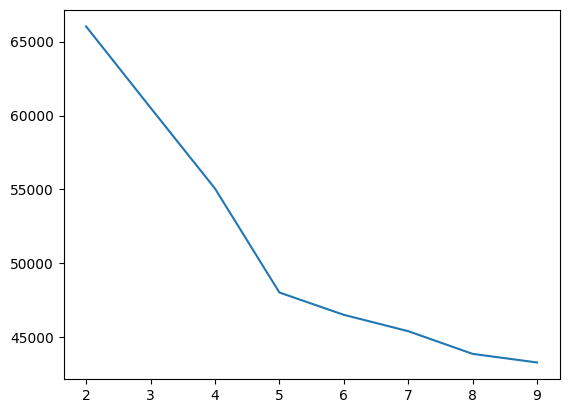

In [45]:
y2 = np.array([i for i in k_values2])
plt.plot(y2, cost2)
plt.show()

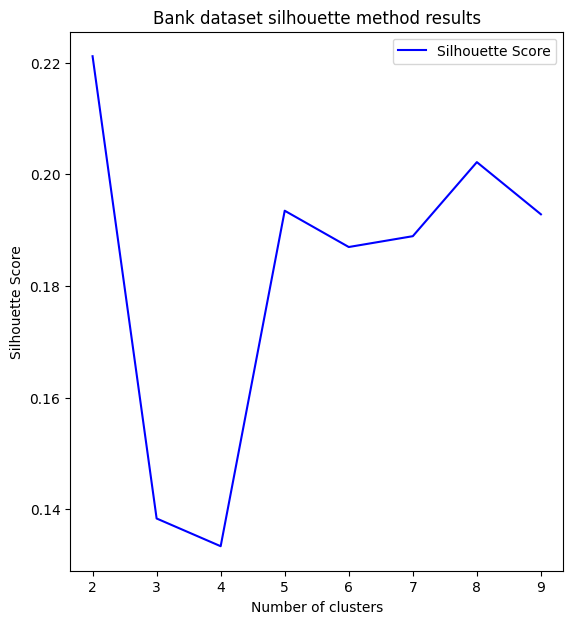

In [46]:
fig = plt.figure(figsize=(14,7))
fig.add_subplot(122)
plt.title("Bank dataset silhouette method results")
plt.plot(k_values2, sil2,'b-',label='Silhouette Score')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

In [48]:
#k=8
km_cao2 = KModes(n_clusters=8, init = "Cao", n_init = 5, verbose=1)
model2 = km_cao2.fit_predict(df2)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 507, cost: 43876.0


Vemos que claramente hay 5 clusters. El coste ha bajado de 17,000 a 4,800.

In [49]:
model2 = pd.DataFrame(model2)
df_final = pd.concat([df2, model2], axis =1)
df_final = df_final.rename(columns = {0:"cluster"})
df_final.head()

,job,education,housing,loan,cluster
0,3,0,0,0,1
1,7,3,0,0,1
2,7,3,2,0,2
3,0,1,0,0,5
4,7,3,0,2,1


In [50]:
df_final['cluster'].value_counts().sort_values(ascending=False)

0    12287
1    10581
4     5170
2     5029
3     4655
5     1290
7     1199
6      977
Name: cluster, dtype: int64

In [51]:
cluster_0B = df_final[df_final['cluster'] == 0]
cluster_1B = df_final[df_final['cluster'] == 1]
cluster_2B = df_final[df_final['cluster'] == 2]
cluster_3B = df_final[df_final['cluster'] == 3]
cluster_4B = df_final[df_final['cluster'] == 4]
cluster_5B = df_final[df_final['cluster'] == 5]
cluster_6B = df_final[df_final['cluster'] == 6]
cluster_7B = df_final[df_final['cluster'] == 7]

In [52]:
cluster_0B.describe()

,job,education,housing,loan,cluster
count,12287.000000,12287.000000,12287.000000,12287.000000,12287.0
mean,1.939530,5.367787,1.563360,0.363555,0.0
std,3.192251,1.400768,0.808571,0.752391,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,6.000000,2.000000,0.000000,0.0
50%,0.000000,6.000000,2.000000,0.000000,0.0
75%,4.000000,6.000000,2.000000,0.000000,0.0
max,11.000000,7.000000,2.000000,2.000000,0.0


In [53]:
cluster_1B.describe()

,job,education,housing,loan,cluster
count,10581.000000,10581.000000,10581.000000,10581.000000,10581.0
mean,2.966355,2.535583,0.111426,0.291371,1.0
std,3.121515,1.717690,0.432999,0.689148,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,1.000000,0.000000,0.000000,1.0
50%,1.000000,3.000000,0.000000,0.000000,1.0
75%,6.000000,3.000000,0.000000,0.000000,1.0
max,11.000000,7.000000,2.000000,2.000000,1.0


In [54]:
cluster_2B.describe()

,job,education,housing,loan,cluster
count,5029.000000,5029.000000,5029.000000,5029.000000,5029.0
mean,7.888646,3.773315,1.978525,0.344800,2.0
std,1.741421,1.189116,0.144977,0.741179,0.0
min,2.000000,0.000000,1.000000,0.000000,2.0
25%,7.000000,3.000000,2.000000,0.000000,2.0
50%,9.000000,3.000000,2.000000,0.000000,2.0
75%,9.000000,5.000000,2.000000,0.000000,2.0
max,11.000000,7.000000,2.000000,2.000000,2.0


In [55]:
cluster_3B.describe()

,job,education,housing,loan,cluster
count,4655.000000,4655.000000,4655.000000,4655.000000,4655.0
mean,7.138346,5.467454,0.008378,0.283351,3.0
std,2.484110,1.069644,0.091157,0.691476,0.0
min,2.000000,0.000000,0.000000,0.000000,3.0
25%,4.000000,5.000000,0.000000,0.000000,3.0
50%,9.000000,6.000000,0.000000,0.000000,3.0
75%,9.000000,6.000000,0.000000,0.000000,3.0
max,11.000000,7.000000,1.000000,2.000000,3.0


In [56]:
cluster_4B.describe()

,job,education,housing,loan,cluster
count,5170.000000,5170.000000,5170.000000,5170.000000,5170.0
mean,1.832108,1.740426,1.973501,0.341006,4.0
std,2.103267,1.540305,0.160629,0.734392,0.0
min,1.000000,0.000000,1.000000,0.000000,4.0
25%,1.000000,1.000000,2.000000,0.000000,4.0
50%,1.000000,2.000000,2.000000,0.000000,4.0
75%,1.000000,2.000000,2.000000,0.000000,4.0
max,11.000000,7.000000,2.000000,2.000000,4.0


In [57]:
cluster_5B.describe()

,job,education,housing,loan,cluster
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.0
mean,3.058140,2.744186,0.006977,0.275194,5.0
std,3.478699,1.779458,0.083267,0.684136,0.0
min,0.000000,0.000000,0.000000,0.000000,5.0
25%,0.000000,2.000000,0.000000,0.000000,5.0
50%,2.000000,2.000000,0.000000,0.000000,5.0
75%,6.000000,2.000000,0.000000,0.000000,5.0
max,11.000000,7.000000,1.000000,2.000000,5.0


In [58]:
cluster_6B.describe()

,job,education,housing,loan,cluster
count,977.000000,977.000000,977.000000,977.000000,977.0
mean,6.206755,4.319345,1.770727,0.360287,6.0
std,1.969604,1.884570,0.599387,0.737727,0.0
min,2.000000,0.000000,0.000000,0.000000,6.0
25%,5.000000,5.000000,2.000000,0.000000,6.0
50%,7.000000,5.000000,2.000000,0.000000,6.0
75%,7.000000,5.000000,2.000000,0.000000,6.0
max,11.000000,7.000000,2.000000,2.000000,6.0


In [59]:
cluster_7B.describe()

,job,education,housing,loan,cluster
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.0
mean,4.844037,0.309425,1.520434,0.344454,7.0
std,1.909871,1.368072,0.827960,0.725600,0.0
min,2.000000,0.000000,0.000000,0.000000,7.0
25%,3.000000,0.000000,1.000000,0.000000,7.0
50%,5.000000,0.000000,2.000000,0.000000,7.0
75%,5.000000,0.000000,2.000000,0.000000,7.0
max,11.000000,7.000000,2.000000,2.000000,7.0


Vemos que las mayores diferencias entre los clientes del banco son la educación y si tiene una hipoteca contratada. 

In [60]:
df['cluster'] = df_final['cluster']

In [61]:
import plotly.express as px
fig = px.scatter(df_final, x=df["education"], y=df["housing"], color=df["cluster"]).update_layout(
    xaxis_title="Education", yaxis_title="Housing Loan"
)
fig.show()

In [62]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df, x='education', y='housing', z='age', color='cluster',title="Bank Customers")
fig.show()